# **Credit Card Fraud Detection**

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_auc_score,roc_curve
sns.set()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [4]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


As we already know that the data is highly unbalanced let's check the class column

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

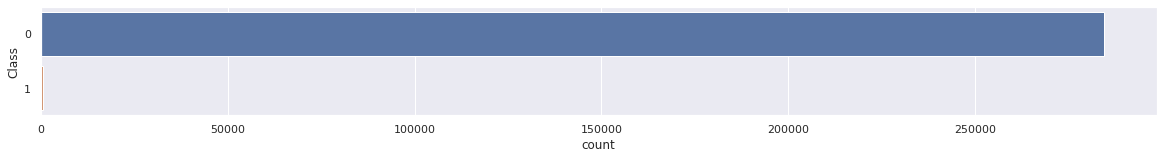

In [7]:
plt.figure(figsize=(20,2))
sns.countplot(y=data['Class'])
plt.savefig('countofdata.png')
plt.show()

As you can see by te above graph we can interpret how data is highly unbalanced

In [8]:
print(f'Percentage of data where class = 1 is : {(len(data[data.Class == 1])/ len(data[data.Class == 0]))*100}')

Percentage of data where class = 1 is : 0.17304750013189596


In [9]:
#Create train and test dataset
from sklearn.model_selection import train_test_split
X = data.drop('Class',axis=1)
y = data['Class']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
print(f'Shape of X_train :{X_train.shape}')
print(f'Shape of X_train :{X_test.shape}')
print(f'Shape of X_train :{y_train.shape}')
print(f'Shape of X_train :{y_test.shape}')

Shape of X_train :(227845, 30)
Shape of X_train :(56962, 30)
Shape of X_train :(227845,)
Shape of X_train :(56962,)


## **Baseline models**

In [12]:
# DummyClassifier to predict only target 0
from sklearn.dummy import DummyClassifier

In [13]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [14]:
dummy_pred = dummy.predict(X_test)
#Check for the unique labels
print(f'Unique predicted labels : {np.unique(dummy_pred)}')

Unique predicted labels : [0]


In [15]:
#Check the accuracy for unique predicated labels
print(f'Accuracy for the test dataset : {accuracy_score(dummy_pred,y_test)}')

Accuracy for the test dataset : 0.9982795547909132


We got an accuracy score of 99.8% —
And without even training a model! Let’s compare this to logistic regression, an actual trained classifier.

## Logistic Regression 

In [16]:
#Now let's use the Logistic regression model to check the accuracy on inbalanced data set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [17]:
#Predict the value by Logistic Regression
lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#Predict on test dataset
lr_pred = lr.predict(X_test)

In [19]:
#check the accuracy
accuracy_score(lr_pred,y_test)

0.9986306660580738

In [20]:
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    56872
1       90
Name: 0, dtype: int64

As we can the Logistic regression outperformed on the Dummy Classifier.Becuase here our model identied that the 90 trascations are from class 1 i.e. fraudulent.
Let's see by using SVM and Random Forest Can we increase the Accuracy

## **Check by using Different Metrices**
* Accuracy metric is not best metric to use when evaluating imbalanced class as it can be mislead for the classification.
* Following are some metrics give us the good insights on the imbalanced dataset

    ### 1. **Confusion Metrics : ** 
    confusion metrics show the clearly classification of the predicted class vs actual class.We can also see how many data point wrongly classified.
    ### 2. **Precision : **
    We can get the precision by number of all positive classified value divided by all positive predicted value.It's measure the classifier's exactness.Low presicion indicates the high number of false positive.
    ### 3. **Recall : **
    Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.
    Unlike precision that only comments on the correct positive predictions out of all positive predictions, recall provides an indication of missed positive predictions.
    ### 4. **F1-score : **
    The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data.
    ### 5. **Classification Report : **
    All above metioned things are auto-generated in the classication report

In [21]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report,recall_score

In [22]:
f1_score(y_test,lr_pred)

0.5851063829787235

In [23]:
pd.DataFrame(confusion_matrix(y_test,lr_pred))

,0,1
0,56829,35
1,43,55


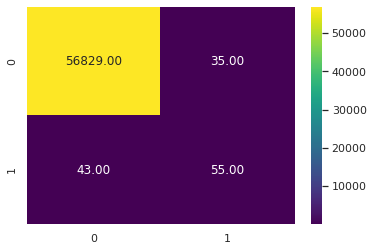

In [24]:
sns.heatmap(confusion_matrix(y_test,lr_pred),cmap='viridis',annot=True,fmt='.2f')
plt.savefig('lr.png')
plt.show()

In [25]:
recall_score(y_test,lr_pred)

0.5612244897959183

As we can see the our accuracy matrix score is near about 99% but the f1 score is only 58%

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [27]:
random_forest = RandomForestClassifier()
svc = SVC()

In [28]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
random_forest_pred = random_forest.predict(X_test)

In [30]:
accuracy_score(random_forest_pred,y_test)

0.9995611109160493

In [31]:
f1_score(random_forest_pred,y_test)

0.8571428571428571

In [32]:
pd.DataFrame(confusion_matrix(random_forest_pred,y_test))

,0,1
0,56862,23
1,2,75


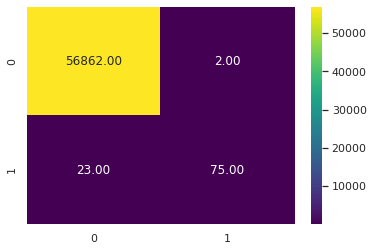

In [33]:
sns.heatmap(confusion_matrix(y_test,random_forest_pred),cmap='viridis',annot=True,fmt='.2f')
plt.savefig('random.png')
plt.show()

In [34]:
recall_score(random_forest_pred,y_test)

0.974025974025974

As we Can see by using random forest we are getting good score and recall is also good enough.Let's print the classification report for the above

In [35]:
print(classification_report(random_forest_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56885
           1       0.77      0.97      0.86        77

    accuracy                           1.00     56962
   macro avg       0.88      0.99      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## Deep Leaning Approch

In [36]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

In [37]:
model = Sequential([
    Dense(units=16,input_dim = 30,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1,activation='sigmoid')
])

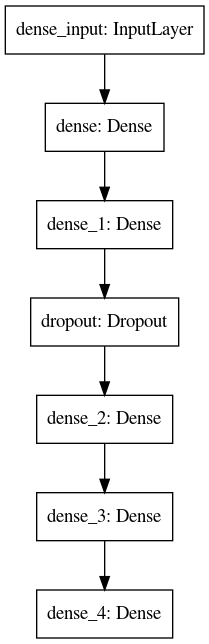

In [38]:
plot_model(model)

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,933
Trainable params: 1,933
Non-trainable params: 0
______________________________________________________

In [40]:
##Training of model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Train on 227845 samples
Epoch 1/5
227845/227845 [==============================] - 35s 154us/sample - loss: 13.0568 - accuracy: 0.9944
Epoch 2/5
227845/227845 [==============================] - 36s 158us/sample - loss: 0.0783 - accuracy: 0.9981
Epoch 3/5
227845/227845 [==============================] - 35s 152us/sample - loss: 0.0198 - accuracy: 0.9983
Epoch 4/5
227845/227845 [==============================] - 35s 152us/sample - loss: 0.0392 - accuracy: 0.9982
Epoch 5/5
227845/227845 [==============================] - 35s 154us/sample - loss: 0.0459 - accuracy: 0.9983


In [41]:
score = model.evaluate(X_test,y_test)

56962/56962 [==============================] - 2s 41us/sample - loss: 0.0128 - accuracy: 0.9983


In [42]:
y_pred = model.predict(X_test)
y_test_copy = pd.DataFrame(y_test)

In [43]:
y_pred = y_pred.astype(int)

In [44]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,56864,0
1,98,0


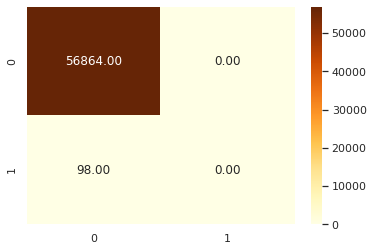

In [45]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='YlOrBr',fmt='.2f')
plt.savefig('deep.png')
plt.show()

As we can see the Type-II error is to much high for the fradulent data.As the model is biased towards the majority class.and to reduce the error model simply ignoring the fradulent trasactions

# Approaches to Handling Imbalanced Dataset:

## 1. **Resampling Technique:** 
In the Resampling technique, our main goal is to either increase the frequency of minority class or decrease the frequency of the majority class. This is done in order to obtain the same number of instances of both classes.
    Following are the few Resampling techniques:
### 1. **Random Over-sampling :**
Random Over-sampling can be defined as adding More copies of the minority class. but the oversampling choice is good when you don't have a ton of data to work.
    We will use the resampling module from scikit-learn to randomly replicate the samples from minority class.To perform oversampling it's important that we should have split the data into train and test dataset.
    Now the question will come why should we have to split before the oversampling. The answer is easy, oversampling allows us the exact same observations to be present into both the train and test dataset.


In [46]:
from sklearn.utils import resample

#Seprate the input feature and target 
X = data.drop('Class',axis=1)
y= data['Class']

In [47]:

#As told split the data into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
print(f'Shape of X_train :{X_train.shape}')
print(f'Shape of X_train :{X_test.shape}')
print(f'Shape of X_train :{y_train.shape}')
print(f'Shape of X_train :{y_test.shape}')

Shape of X_train :(213605, 30)
Shape of X_train :(71202, 30)
Shape of X_train :(213605,)
Shape of X_train :(71202,)


In [48]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83225,59741.0,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,...,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,38.42,0
52800,45648.0,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,...,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,61.20,0
21293,31579.0,1.134626,-0.774460,-0.163390,-0.533358,-0.604555,-0.244482,-0.212682,0.040782,-1.136627,...,-0.684454,-1.855269,0.171997,-0.387783,-0.062985,0.245118,-0.061178,0.012180,110.95,0
133600,80455.0,0.069514,1.017753,1.033117,1.384376,0.223233,-0.310845,0.597287,-0.127658,-0.701533,...,0.097023,0.369957,-0.219266,-0.124941,-0.049749,-0.112946,0.114440,0.066101,10.00,0
38225,39302.0,-0.199441,0.610092,-0.114437,0.256565,2.290752,4.008475,-0.123530,1.038374,-0.075846,...,-0.019733,0.165463,-0.080978,1.020656,-0.300730,-0.269595,0.481769,0.254114,22.00,0


In [50]:
#Seperate minority and majority class:
not_fraud = X[X['Class'] == 0]
fraud = X[X['Class'] == 1]
print(f'Total sample which are not fraud : {len(not_fraud)}')
print(f'Total Fraud samples : {len(fraud)}')

Total sample which are not fraud : 213226
Total Fraud samples : 379


In [51]:
#Now use the oversampling techniques
random_sampling = resample(fraud,
                          replace=True,
                           n_samples = len(not_fraud),
                           random_state = 42
                          )

#combine minority and upsample data
upsample = pd.concat([not_fraud,random_sampling])

#Check new values are balances for the both classes or not
upsample['Class'].value_counts()

1    213226
0    213226
Name: Class, dtype: int64

Now Try the logistic Regression on this data

In [54]:
X_train = upsample.drop('Class',axis=1)
y_train = upsample['Class']

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
upsampled_pred = lr_model.predict(X_test)

In [56]:
#check for the accuracy_score
accuracy_score(y_test,upsampled_pred)

0.9562090952501334

In [57]:
#F1 score is
f1_score(y_test, upsampled_pred)

0.06197352587244284

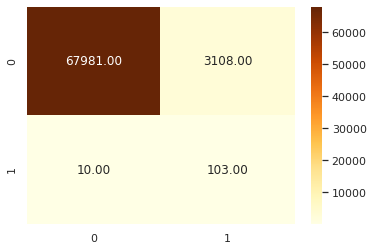

In [58]:
sns.heatmap(confusion_matrix(y_test,upsampled_pred),annot=True,fmt='.2f',cmap='YlOrBr')
plt.savefig('ligit_after_oversample.png')
plt.show()

In [60]:
print(classification_report(y_test,upsampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71089
           1       0.03      0.91      0.06       113

    accuracy                           0.96     71202
   macro avg       0.52      0.93      0.52     71202
weighted avg       1.00      0.96      0.98     71202



Our accuracy score decreased after upsampling, but the model is now predicting both classes more equally, making it an improvement over our plain logistic regression above.

In [65]:
# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    379
0    379
Name: Class, dtype: int64

In [66]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [67]:
accuracy_score(y_test, undersampled_pred)


0.9690458133198505

In [68]:
# f1 score
f1_score(y_test, undersampled_pred)

0.08623548922056384

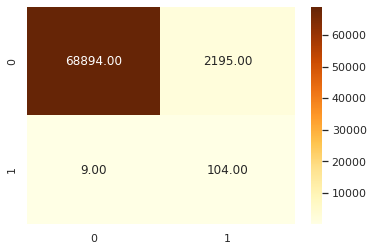

In [71]:
acc

In [72]:
print(classification_report(y_test,undersampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71089
           1       0.05      0.92      0.09       113

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.54     71202
weighted avg       1.00      0.97      0.98     71202



Let's Try with Random Forest Also,

## **Random Forest After Under-Sampling**

In [73]:
#Build the model for the Random Forest
random_forest_undersampled = RandomForestClassifier()
random_forest_undersampled.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
#Predict the value by using random forest
random_forest_undersampled_pred = undersampled.predict(X_test)

In [75]:
accuracy_score(y_test,random_forest_undersampled_pred)

0.9690458133198505

In [76]:
f1_score(y_test,random_forest_undersampled_pred)

0.08623548922056384

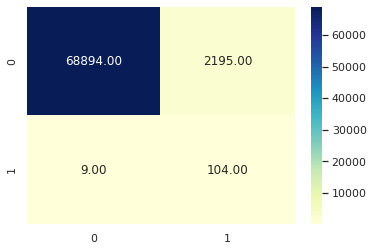

In [81]:
sns.heatmap(confusion_matrix(y_test,random_forest_undersampled_pred),annot=True,fmt='.2f',cmap='YlGnBu')
plt.savefig('rand_after_oversample.png')
plt.show()

In [80]:
print(classification_report(y_test,random_forest_undersampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71089
           1       0.05      0.92      0.09       113

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.54     71202
weighted avg       1.00      0.97      0.98     71202



# **Generate Synthetic Samples:**

# **SMOTE :**
A technique is similar to upsampling is to create synthetic samples. Here we use SMOTE (Synthetic Minority Oversampling Technique) technique.
SMOTE (Synthetic Minority Oversampling Technique) works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space, and drawing a new sample at a point along that line.
By above we can easily understand the SMOTE working is similar to the nearest neighbor algorithm. Yeah you are right!! SMOTE uses the nearest neighbor algorithm to generate new and synthetic data we can use to train our model.

In [84]:
#import the libaray for SMOTE
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = data["Class"]
X = data.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=27,sampling_strategy=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [86]:
smote_logistic = LogisticRegression()
smote_logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
smote_pred = smote_logistic.predict(X_test)

In [88]:
# Checking accuracy
accuracy_score(y_test, smote_pred)

0.9804431024191567

In [89]:
# f1 score
f1_score(y_test, smote_pred)

0.13643410852713178

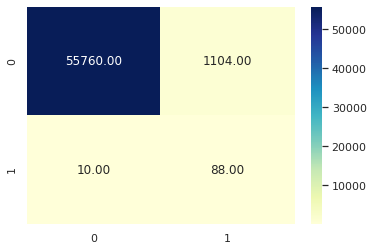

In [90]:
sns.heatmap(confusion_matrix(y_test,smote_pred),annot=True,fmt='.2f',cmap='YlGnBu')
plt.savefig('rand_after_oversample.png')
plt.show()

In [92]:
smote_random_forest = RandomForestClassifier()
smote_random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
smote_rand_pred = smote_random_forest.predict(X_test)

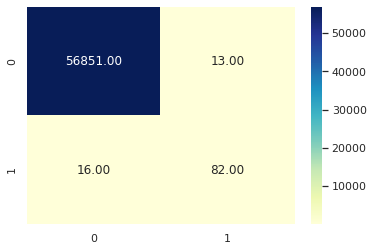

In [97]:
sns.heatmap(confusion_matrix(y_test,smote_rand_pred),annot=True,fmt='.2f',cmap='YlGnBu')
plt.savefig('rand_after_smote.png')
plt.show()

In [96]:
accuracy_score(y_test,smote_rand_pred)

0.9994908886626171

In [98]:
#F1_score is
f1_score(y_test,smote_rand_pred)

0.8497409326424872

In [95]:
print(classification_report(y_test,smote_rand_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Please anyone to balance an imbalanced dataset. According to your data check which one working good with the advantages and disadvantages of every technique.